In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('toy_dataset.csv')
df

,ID,CGPA,IQ
0,1,6.90,113
1,2,7.71,101
2,3,7.23,110
3,4,7.47,107
4,5,5.21,90
...,...,...,...
295,296,8.18,121
296,297,6.77,112
297,298,8.62,119
298,299,9.60,120


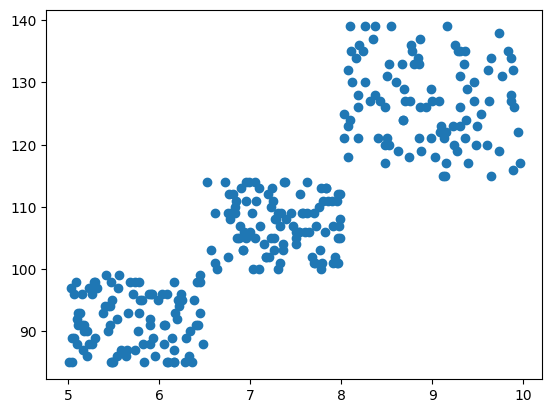

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'], df['IQ'])


In [4]:
from sklearn.cluster import KMeans

In [5]:
# Select only the numeric features you want for clustering
X = df[['CGPA', 'IQ']]

In [6]:
# (Optional but better) scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
wcss =[] # empty list for storing the K (clustors result)
for K in range (1, 11): # 1 to 10 
    km = KMeans(n_clusters=K, random_state = 42)
    km.fit_predict(df)
    wcss.append(km.inertia_)


In [8]:
wcss

[2320794.839163666,
 633173.326279168,
 320661.77502996864,
 211342.00255168974,
 159053.11373320385,
 133990.19144116208,
 112933.13755272774,
 103523.20582944332,
 92833.5311152747,
 83996.41424847381]

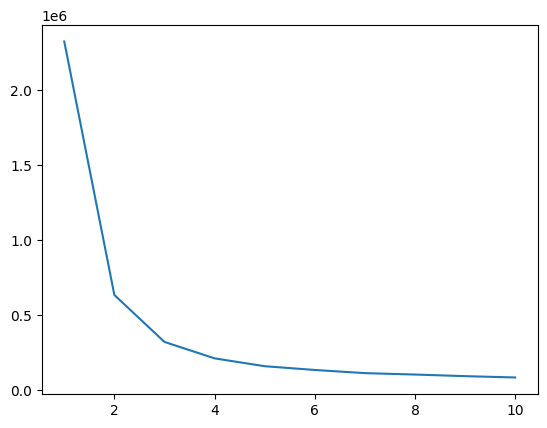

In [9]:
plt.plot(range(1, 11), wcss)

In [10]:

km = KMeans(n_clusters= 3, random_state=42)
y_pred = km.fit_predict(X_scaled)


In [11]:
y_pred

array([2, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1,
       0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1,
       1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0,
       0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0,
       2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1], d

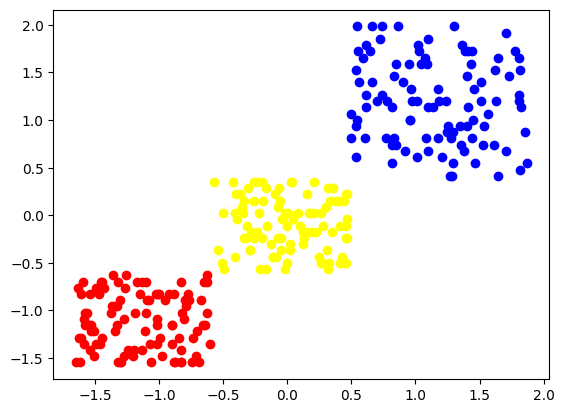

In [12]:
# Plot clusters
plt.scatter(X_scaled[y_pred == 0, 0], X_scaled[y_pred == 0, 1], color='red')
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], color='blue')
plt.scatter(X_scaled[y_pred == 2, 0], X_scaled[y_pred == 2, 1], color='yellow')

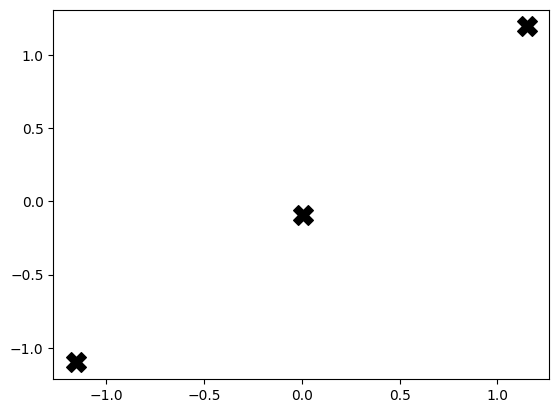

In [13]:
# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')